Comparing SVM decision boudary making with different kernels `Linear`, default `RBF`, `Sigmoid`, `Ploynomial`

In [1]:
from sklearn import svm, datasets 
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#loading data 

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target 

In [3]:
#fitting different SVM Kernels 

models = (
    svm.LinearSVC(C=1.0, max_iter=1000),
    svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    svm.SVC(kernel='sigmoid', gamma=0.005,max_iter=1000),
    svm.SVC(kernel='poly', degree=3, gamma='auto', C=1.0),
)

models = (clf.fit(X, y) for clf in models)

In [4]:
titles = (
    "Linear Kernel",
    "SVM with RBF (default) Kernel",
    "SVM with sigmoid kernel",
    "SVM with polynomial kernel",
)

c:\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


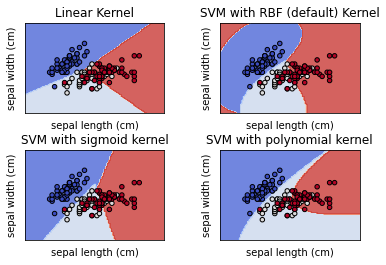

In [5]:
#visualization 

fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4,hspace=0.4)

X0,X1 = X[:,0], X[:,1]

for clf, title, ax, in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap = plt.cm.coolwarm,
        alpha = 0.8,
        ax = ax,
        xlabel = iris.feature_names[0],
        ylabel = iris.feature_names[1],
    )
    ax.scatter(X0, X1, c= y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

SVM with `custom kernel`

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm, datasets 

iris = datasets.load_iris()
X = iris.data[:,:2]
Y = iris.target 


In [13]:
def my_kernel(X,Y):

    M = np.array([[2,0],[0,1.0]])
    return np.dot(np.dot(X,M),Y.T)

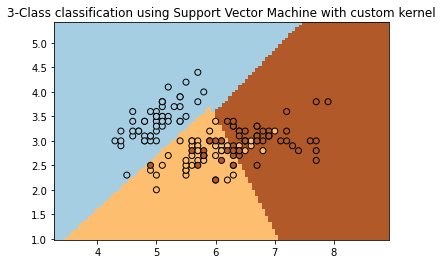

In [14]:
clf = svm.SVC(kernel=my_kernel)
clf.fit(X,y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()